# Agriculture, maternal health and global food insecurity
### What links can be drawn between agriculture, maternal health and their effects on food insecurity in different nations?
Data from the Food and Agriculture Organization (FAO) of the UN
link: http://www.fao.org/faostat/en/#data/FS

### Importing packages and datasets

In [35]:
### Importing packages and dataset
#importing packages
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 

#importing datasets and getting idea of their shape

#dataset with inidividual countries
df1 = pd.read_csv('FAOSTAT_data_5-7-2020 (1).csv')
print(df1.shape)
print(df1.head())

#dataset with countries grouped by economic development
df2 = pd.read_csv('FAOSTAT_data_5-7-2020.csv')
print(df2.shape)
print(df2.head())

(989, 15)
  Domain Code                             Domain  Area Code         Area  \
0          FS  Suite of Food Security Indicators          2  Afghanistan   
1          FS  Suite of Food Security Indicators          2  Afghanistan   
2          FS  Suite of Food Security Indicators          2  Afghanistan   
3          FS  Suite of Food Security Indicators          2  Afghanistan   
4          FS  Suite of Food Security Indicators          2  Afghanistan   

   Element Code Element  Item Code  \
0          6121   Value     210091   
1          6121   Value      21034   
2          6121   Value      21042   
3          6121   Value      21043   
4          6121   Value      21044   

                                                Item  Year Code       Year  \
0  Prevalence of moderate or severe food insecuri...   20142016  2014-2016   
1  Percent of arable land equipped for irrigation...   20142016  2014-2016   
2  Prevalence of obesity in the adult population ...       2015       

### Cleaning datasets

In [36]:
#removing unnecessary columns and changing column labels
df1_c = df1.drop(df1.columns[[0, 1, 2, 4, 5, 6, 8, 10, 12, 13 ,14]], axis=1)
df1_c.rename(columns={'Item':'Parameter',
                    'Area':'Country'},
                  inplace = True)
#converting Value(%) type from str to int
df1_c['Value'] = pd.to_numeric(df1_c['Value'])

#check for missing data and the new shape
print(df1_c.isnull().values.any())
print(df1_c.shape)
print(df1_c.head())

#removing unnecessary columns and changing column labels
df2_c = df2.drop(df2.columns[[0, 2, 4, 6]], axis=1)
df2_c.rename(columns={'Item':'Parameter'},
                  inplace = True)

##converting Value(%) type from str to int
df2_c['Value'] = pd.to_numeric(df2_c['Value'])

#check for missing data and the new shape
print(df2_c.isnull().values.any())
print(df2_c.shape)
print(df2_c.head())

True
(989, 4)
       Country                                          Parameter       Year  \
0  Afghanistan  Prevalence of moderate or severe food insecuri...  2014-2016   
1  Afghanistan  Percent of arable land equipped for irrigation...  2014-2016   
2  Afghanistan  Prevalence of obesity in the adult population ...       2015   
3  Afghanistan  Prevalence of anemia among women of reproducti...       2015   
4  Afghanistan  Prevalence of exclusive breastfeeding among in...       2015   

   Value  
0   45.2  
1   41.4  
2    4.3  
3   40.7  
4   43.1  
False
(12, 3)
                            Area  \
0           Low income economies   
1           Low income economies   
2           Low income economies   
3  Lower-middle-income economies   
4  Lower-middle-income economies   

                                           Parameter  Value  
0  Number of moderately or severely food insecure...  343.7  
1  Percent of arable land equipped for irrigation...    9.4  
2  Prevalence of anemi

### Visualizing data

Parameter
Percent of arable land equipped for irrigation (percent) (3-year average)                              AxesSubplot(0.125,0.125;0.775x0.755)
Percentage of children under 5 years affected by wasting (percent)                                     AxesSubplot(0.125,0.125;0.775x0.755)
Percentage of children under 5 years of age who are overweight (percent)                               AxesSubplot(0.125,0.125;0.775x0.755)
Percentage of children under 5 years of age who are stunted (percent)                                  AxesSubplot(0.125,0.125;0.775x0.755)
Prevalence of anemia among women of reproductive age (15-49 years)                                     AxesSubplot(0.125,0.125;0.775x0.755)
Prevalence of exclusive breastfeeding among infants 0-5 months of age                                  AxesSubplot(0.125,0.125;0.775x0.755)
Prevalence of low birthweight (percent)                                                                AxesSubplot(0.125,0.125;0.775x0.755)
Prevalence

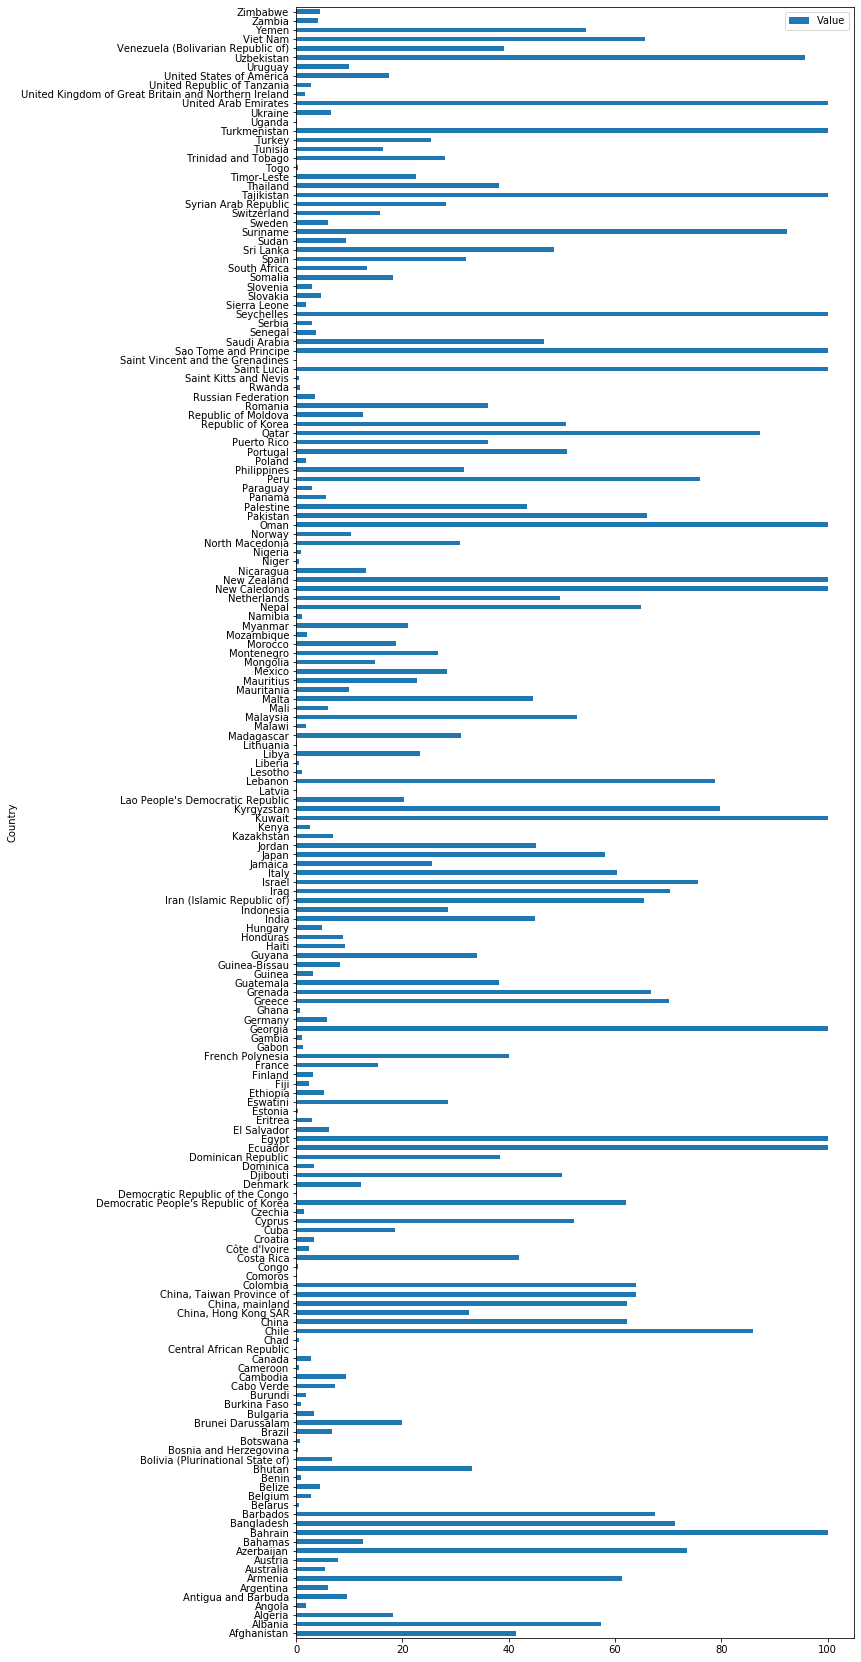

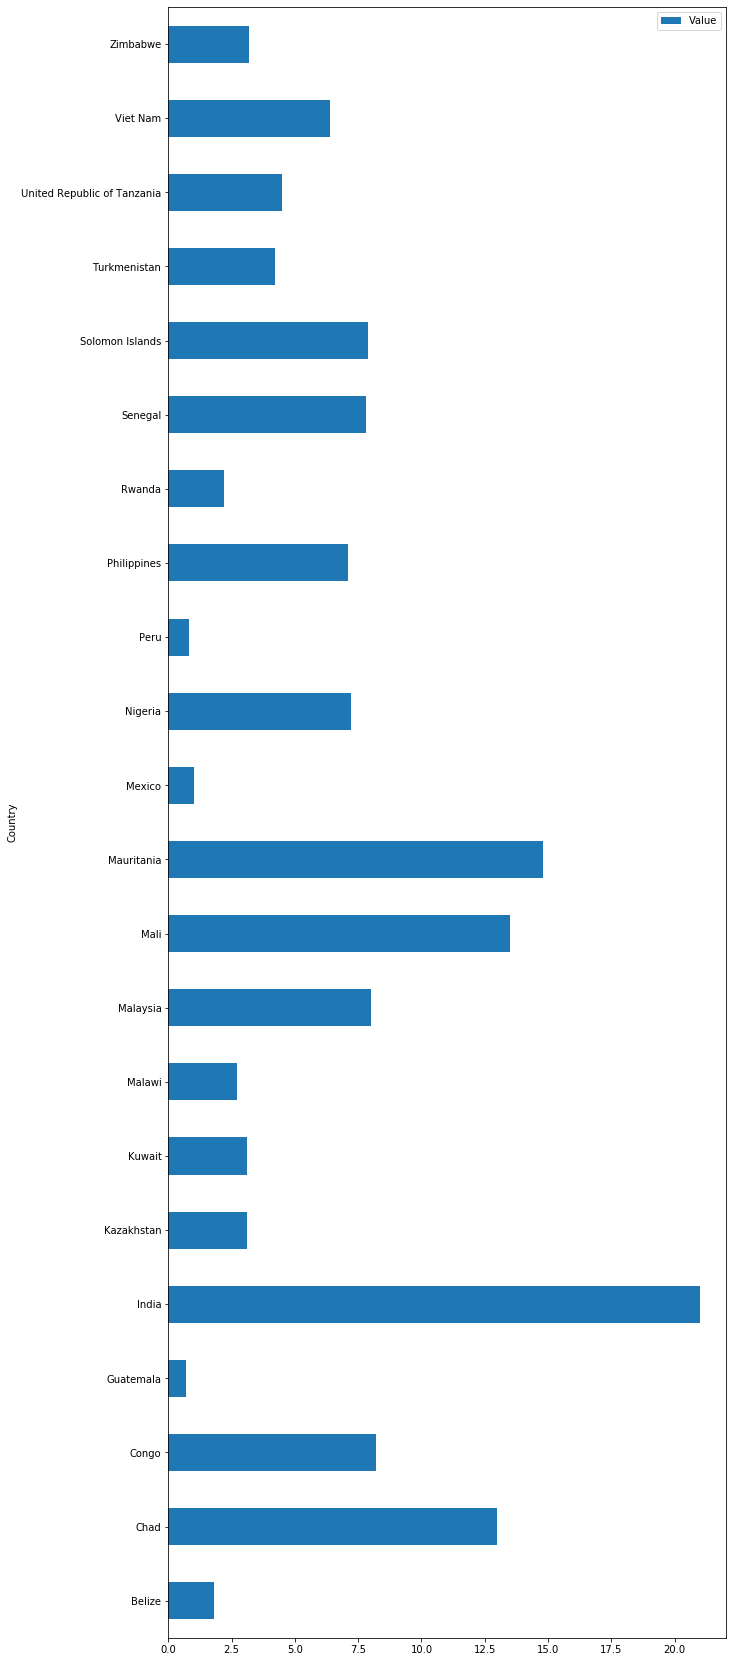

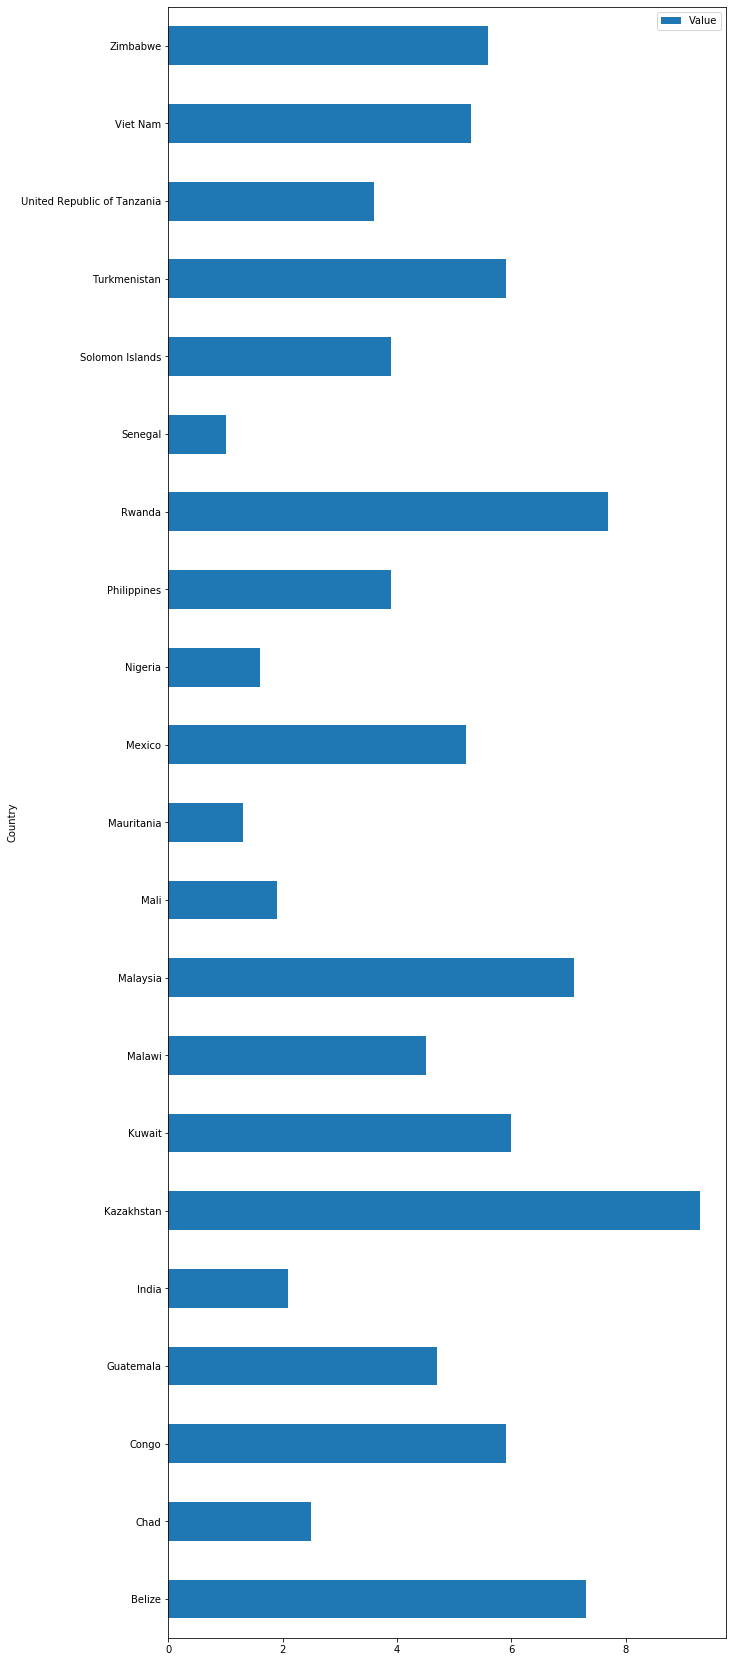

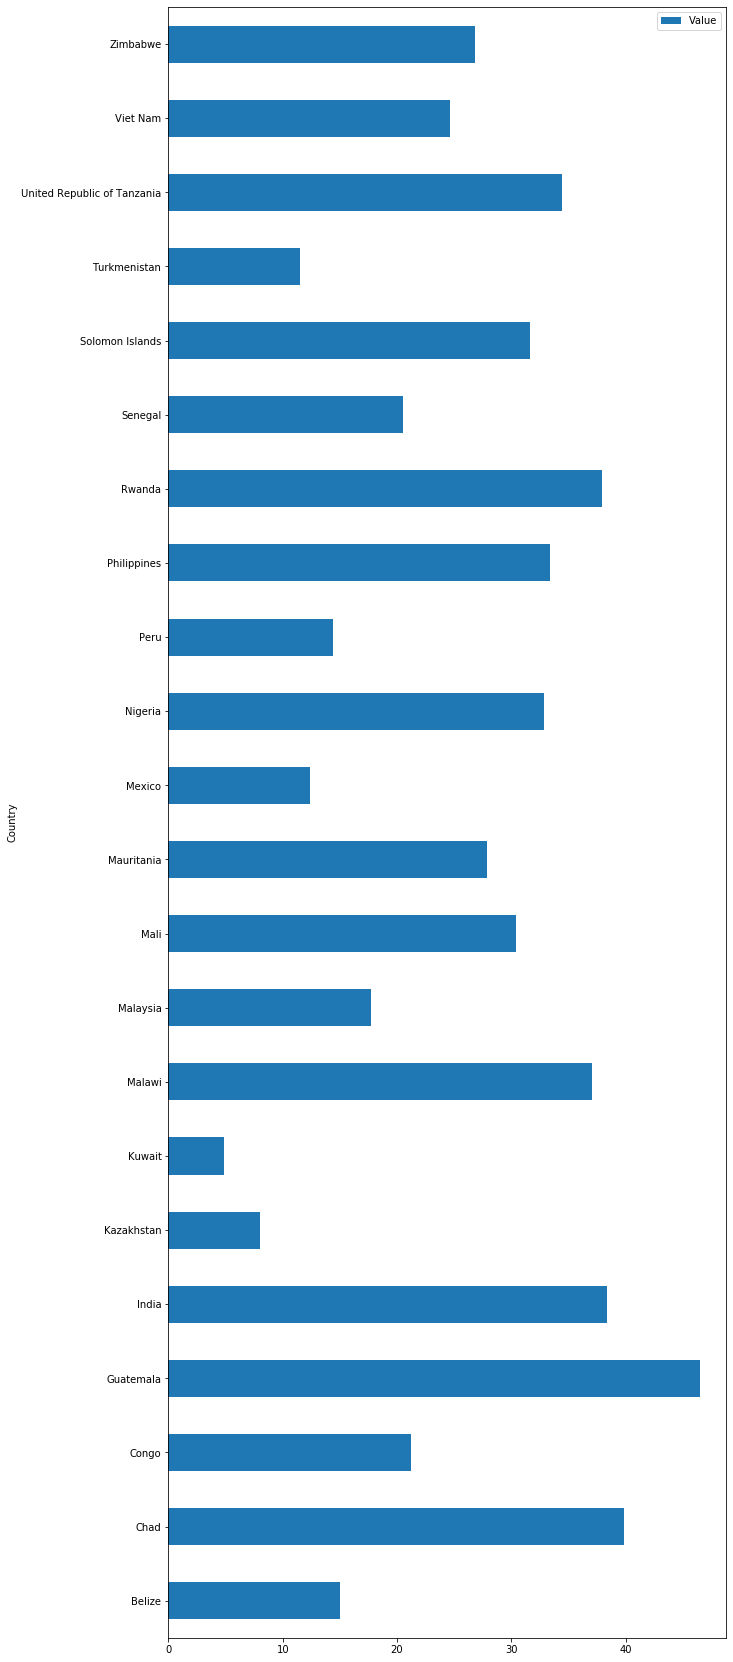

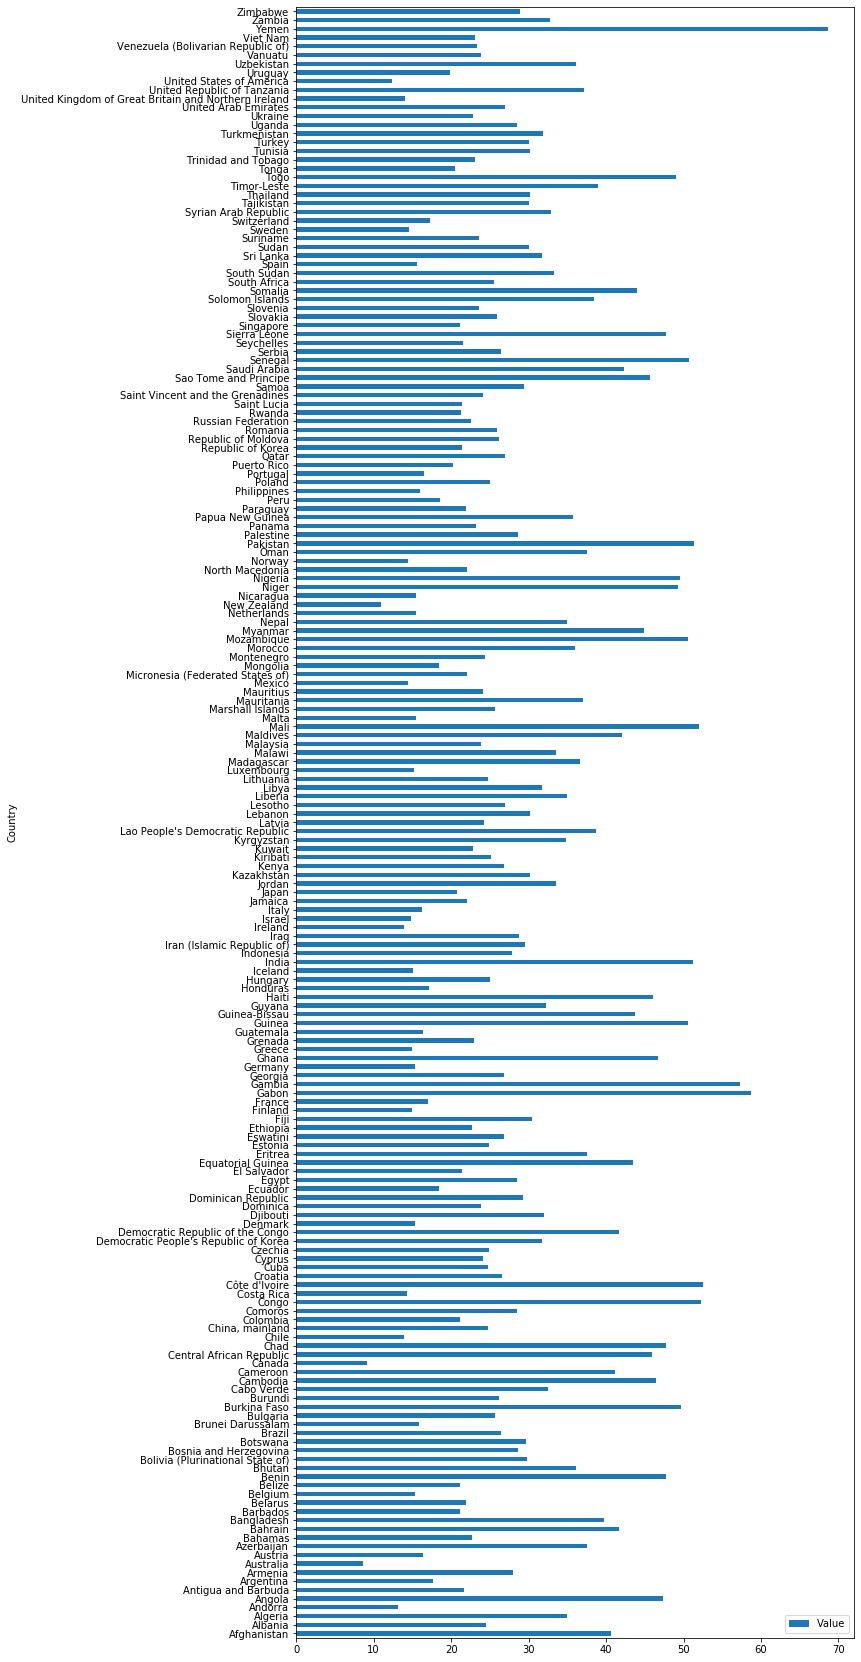

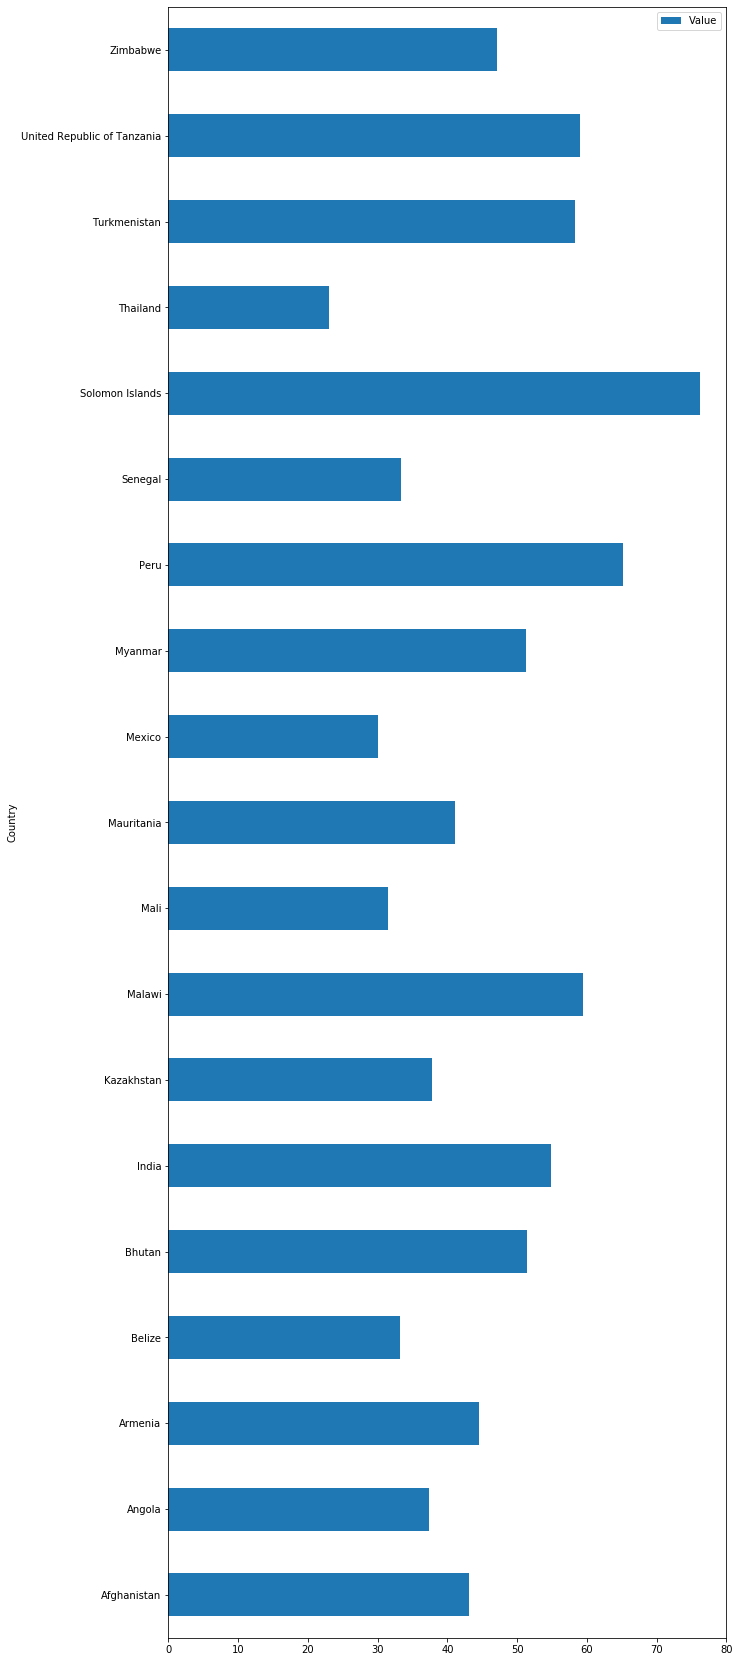

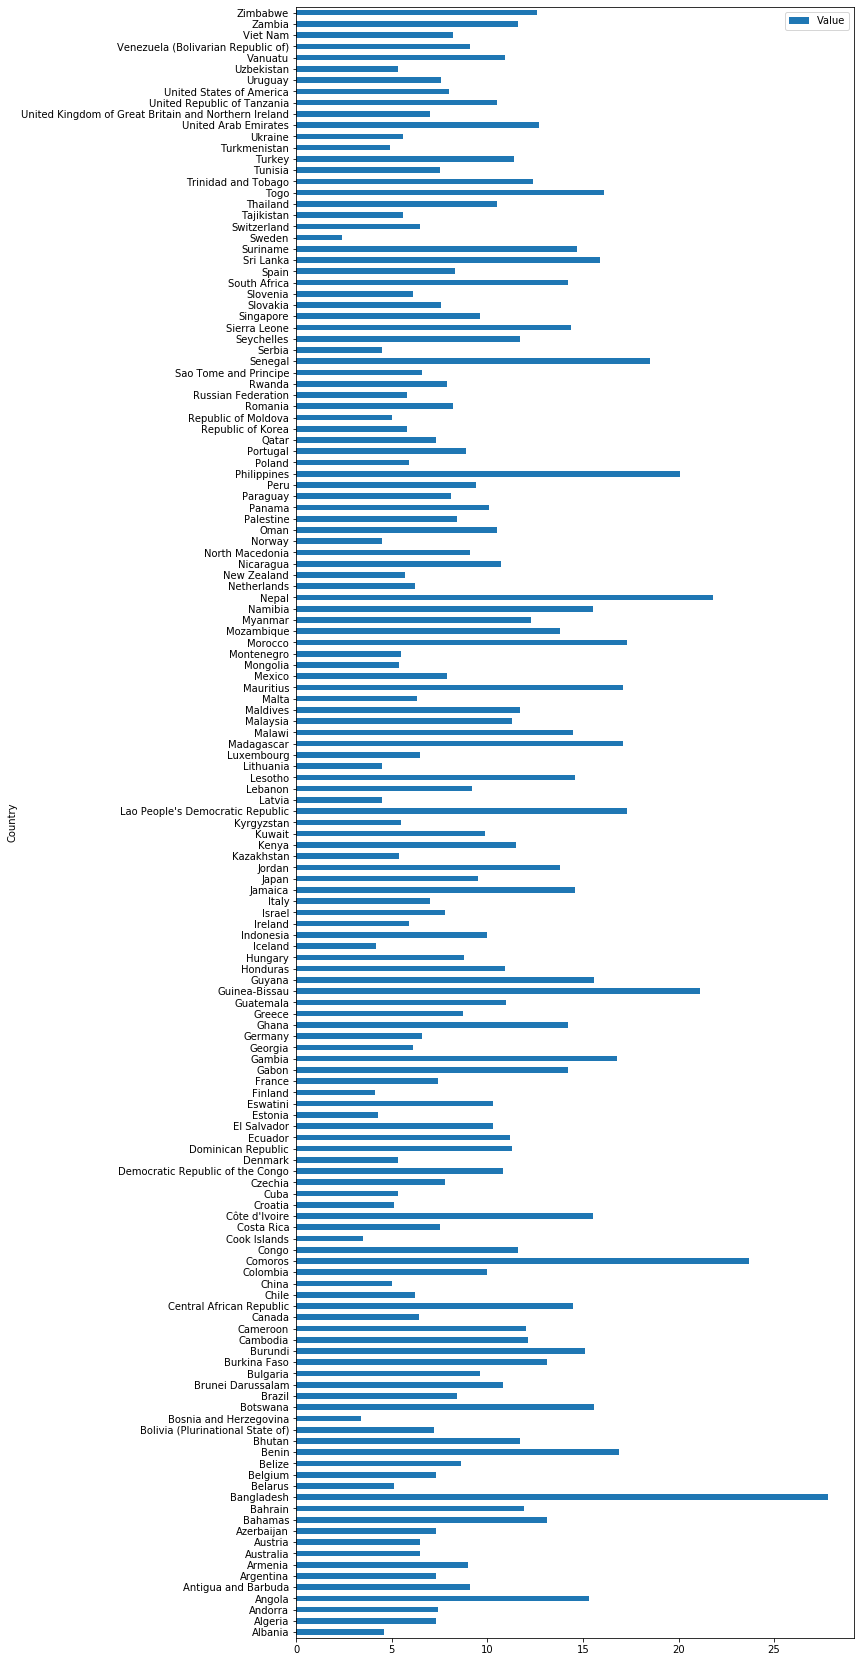

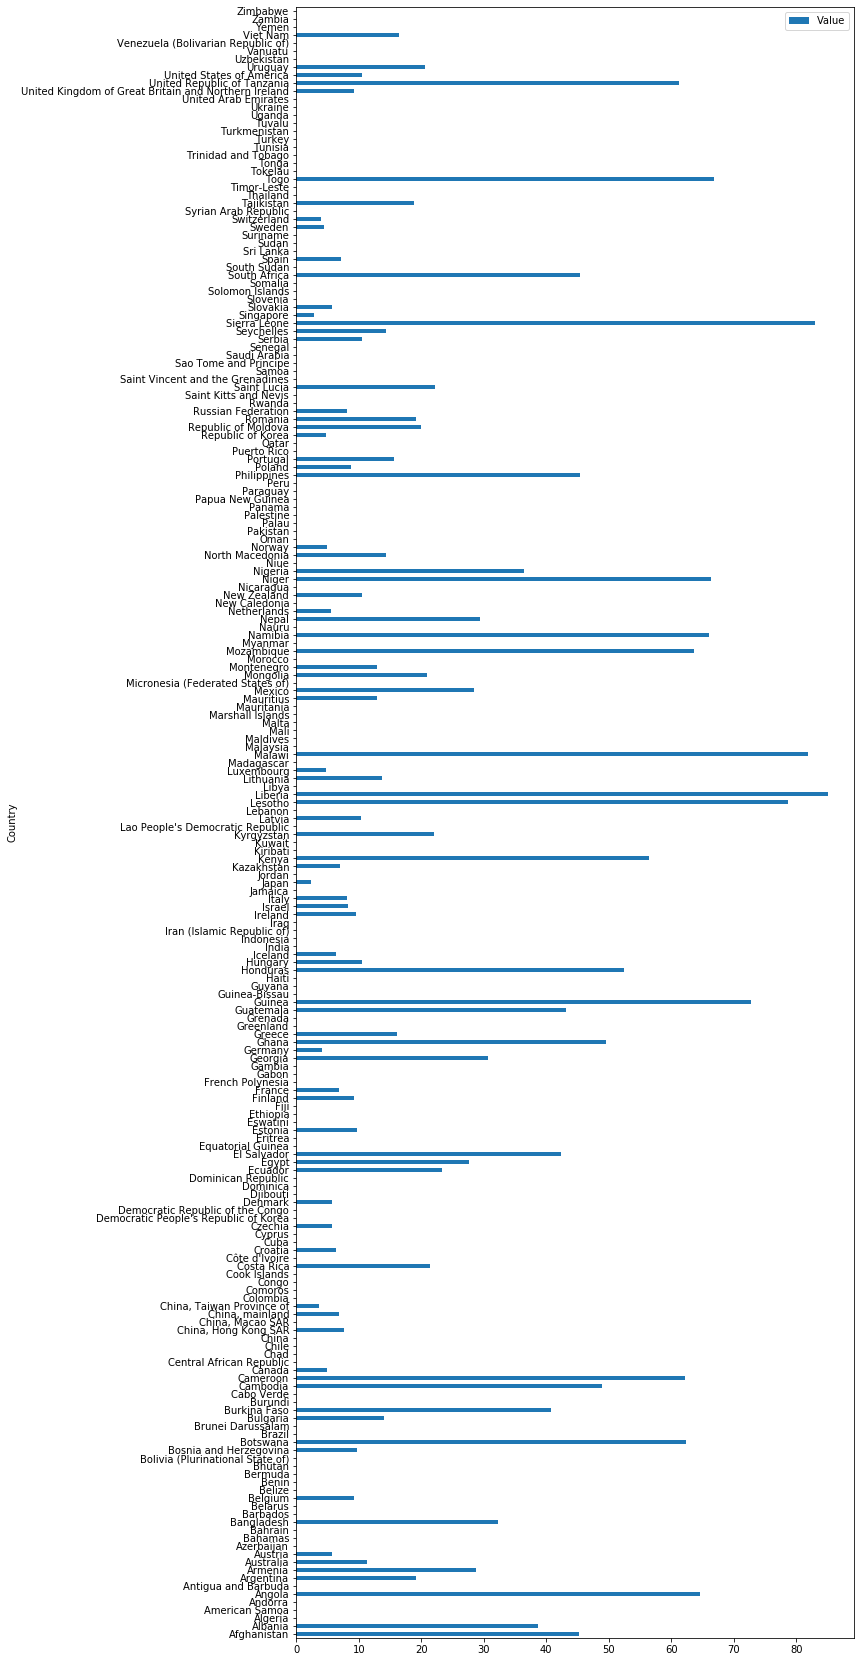

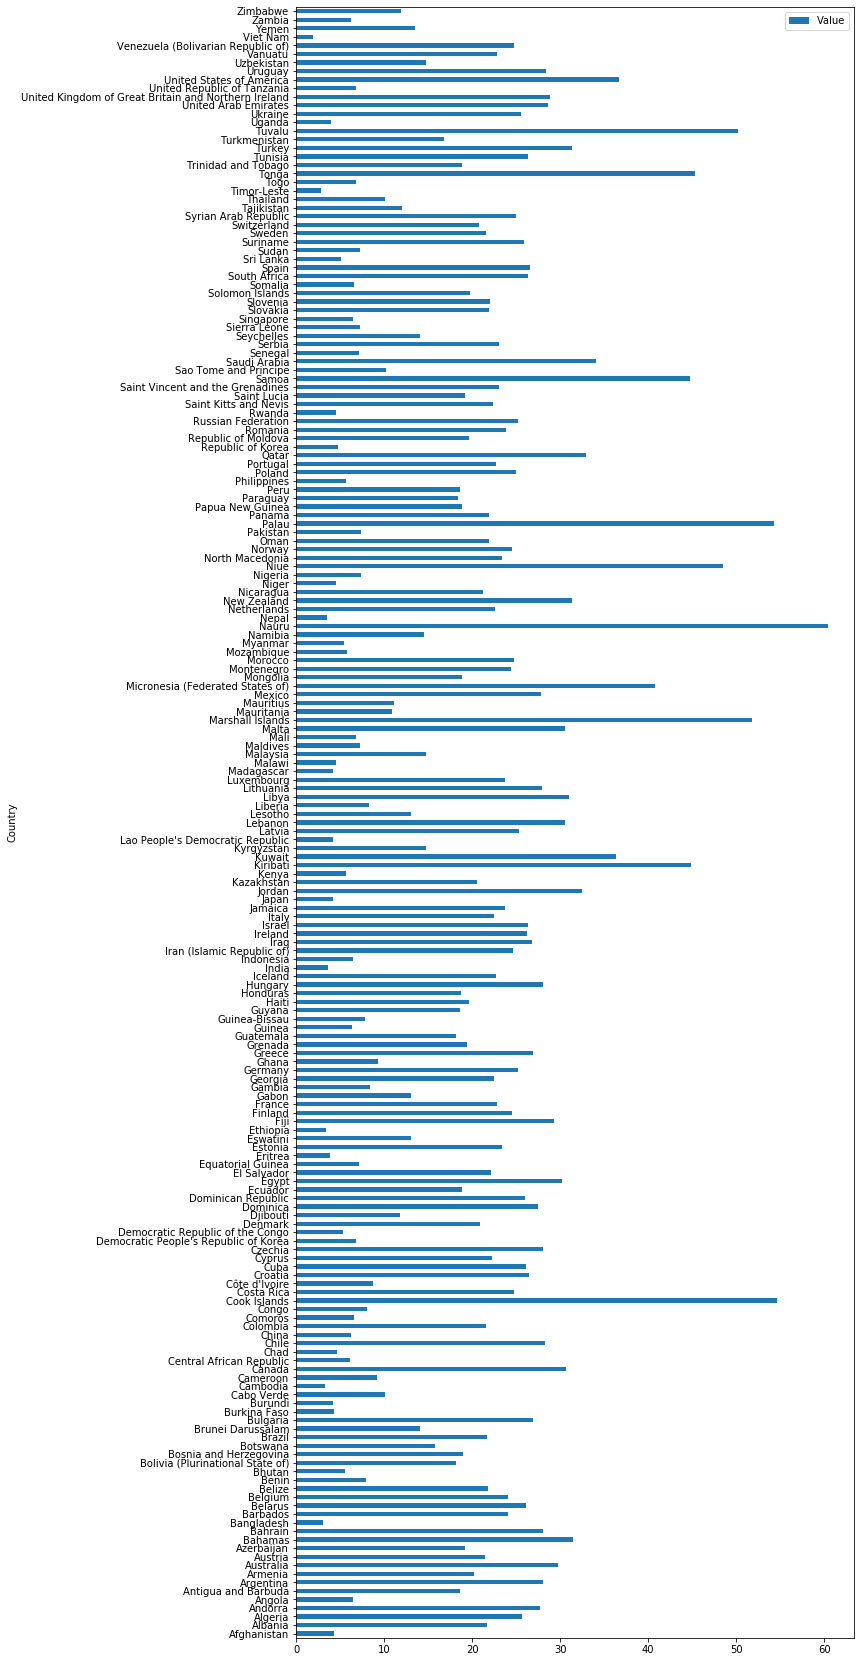

In [47]:
#individual plots of the countries vs food insecurity indicator for each indicator
df1_c.groupby('Parameter').plot(figsize=(10,30), kind='barh', x='Country', y='Value')

Parameter
Number of moderately or severely food insecure people (million) (annual value)    AxesSubplot(0.125,0.125;0.775x0.755)
Percent of arable land equipped for irrigation (percent) (3-year average)         AxesSubplot(0.125,0.125;0.775x0.755)
Prevalence of anemia among women of reproductive age (15-49 years)                AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

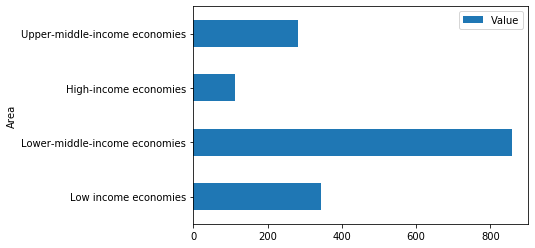

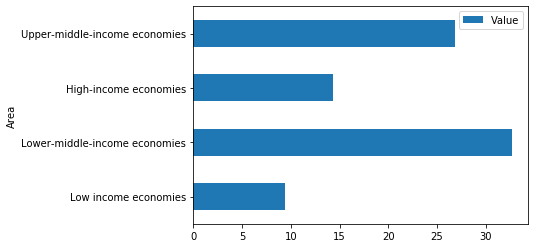

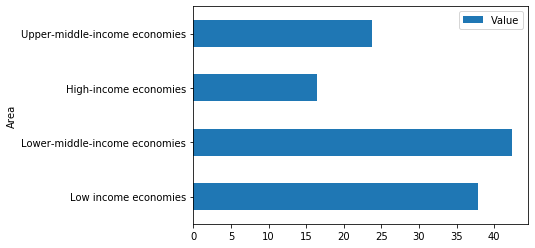

In [49]:
#individ plots of the economically divided regions vs food insecurity indicators for each indicator
df2_c.groupby('Parameter').plot(kind='barh', x='Area', y='Value')

In [51]:
#parsing out the different parameters by row

df1_msfi = df1_c[df1_c['Parameter'].str.contains('insecurity')]
df1_arable = df1_c[df1_c['Parameter'].str.contains('arable')]
df1_obese = df1_c[df1_c['Parameter'].str.contains('obesity')]
df1_anemia = df1_c[df1_c['Parameter'].str.contains('anemia')]
df1_breastfeeding = df1_c[df1_c['Parameter'].str.contains('breastfeed')]

print(df1_msfi.shape)
print(df1_arable.shape)
print(df1_obese.shape)
print(df1_anemia.shape)
print(df1_breastfeeding.shape)

(204, 4)
(178, 4)
(191, 4)
(187, 4)
(19, 4)


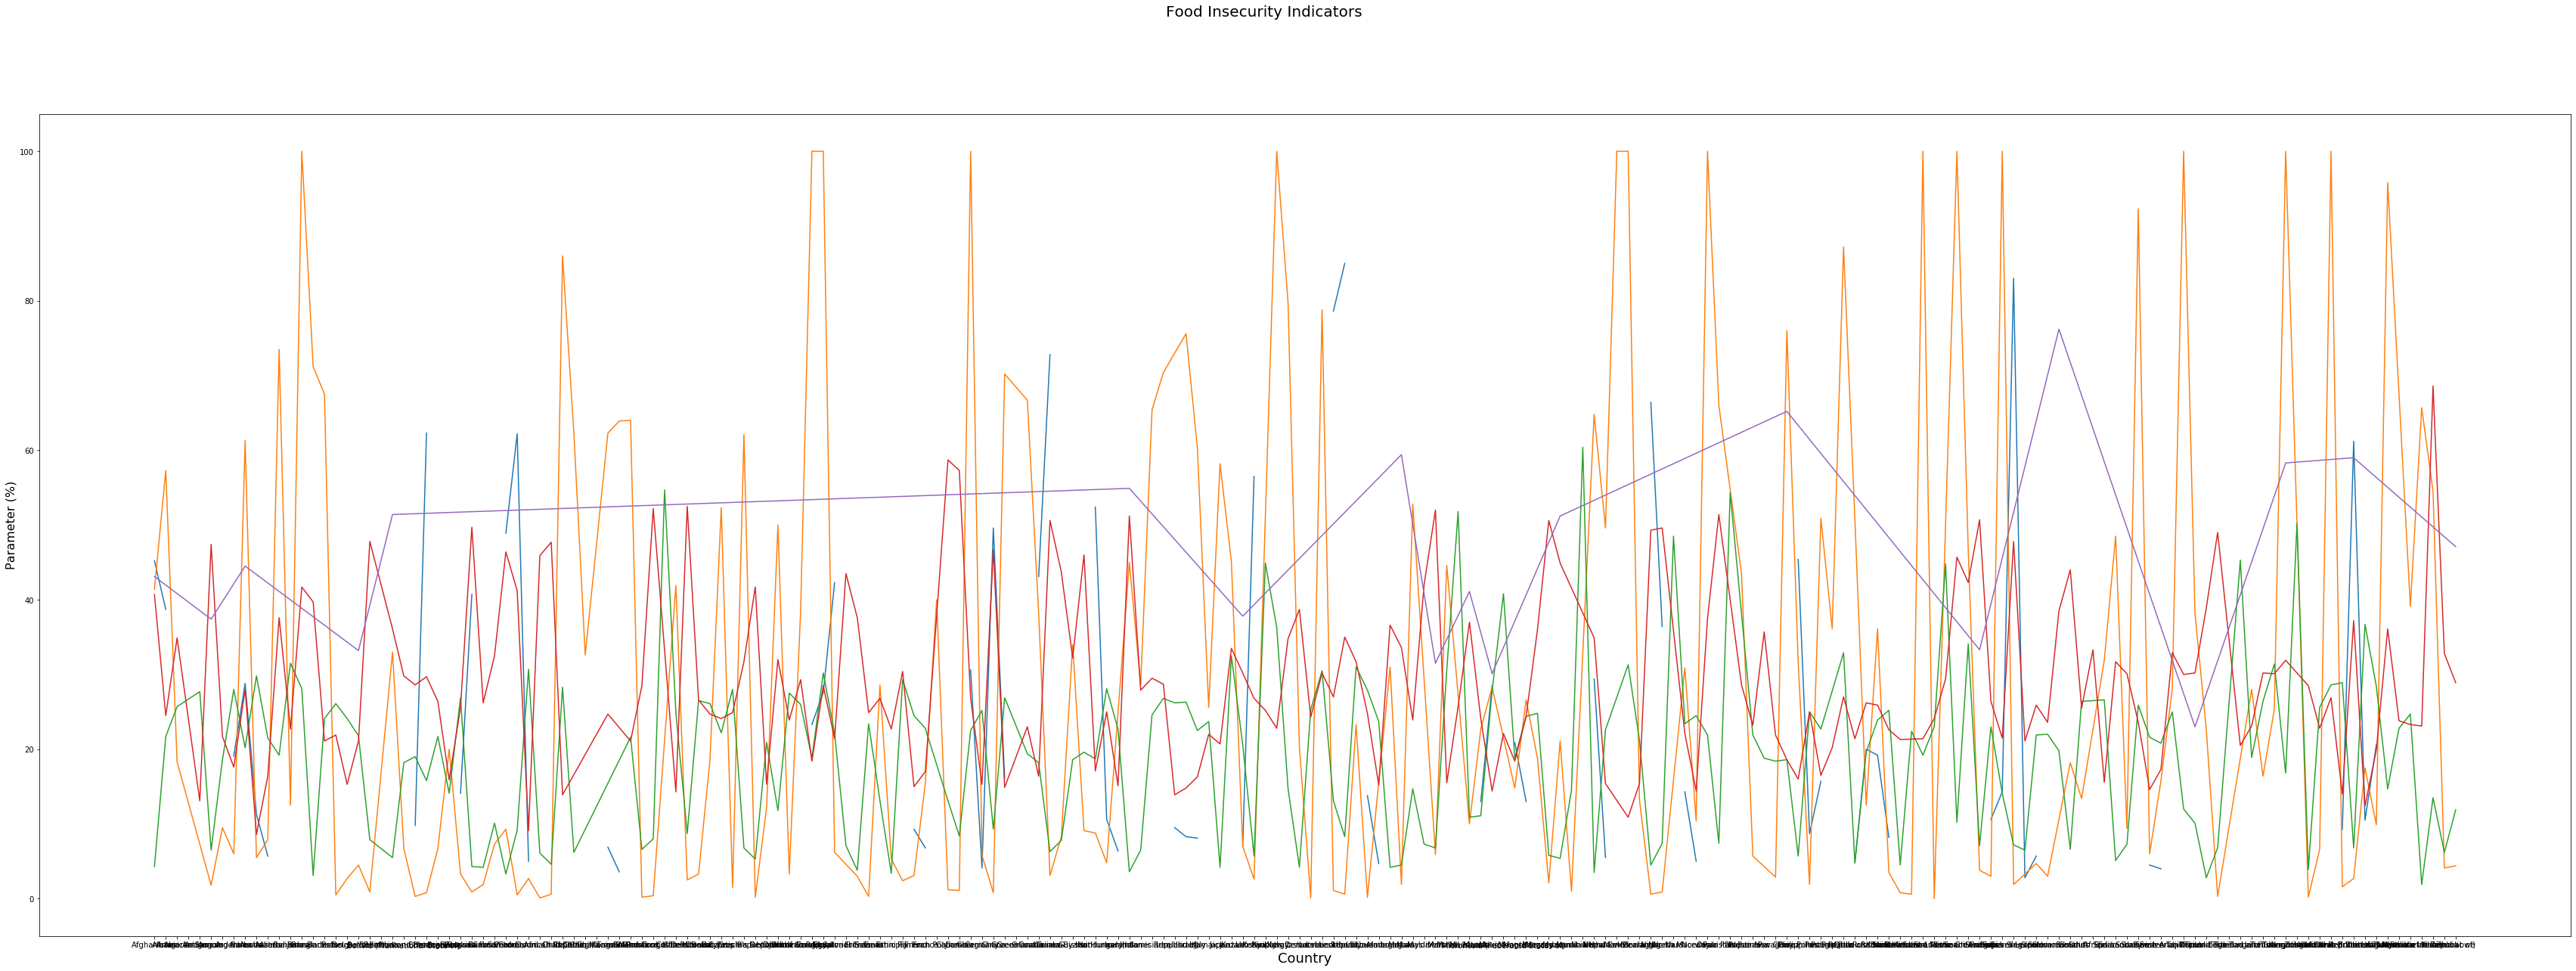

In [85]:
fig1 = plt.figure(figsize=(60,20))

for frame in [df1_msfi, df1_arable, df1_obese, df1_anemia, df1_breastfeeding]:
    plt.plot(frame['Country'],frame['Value'])
    fig1.suptitle('Food Insecurity Indicators', fontsize=20)
    plt.xlabel('Country', fontsize=18,)
    plt.ylabel('Parameter (%)', fontsize=16)
plt.show()

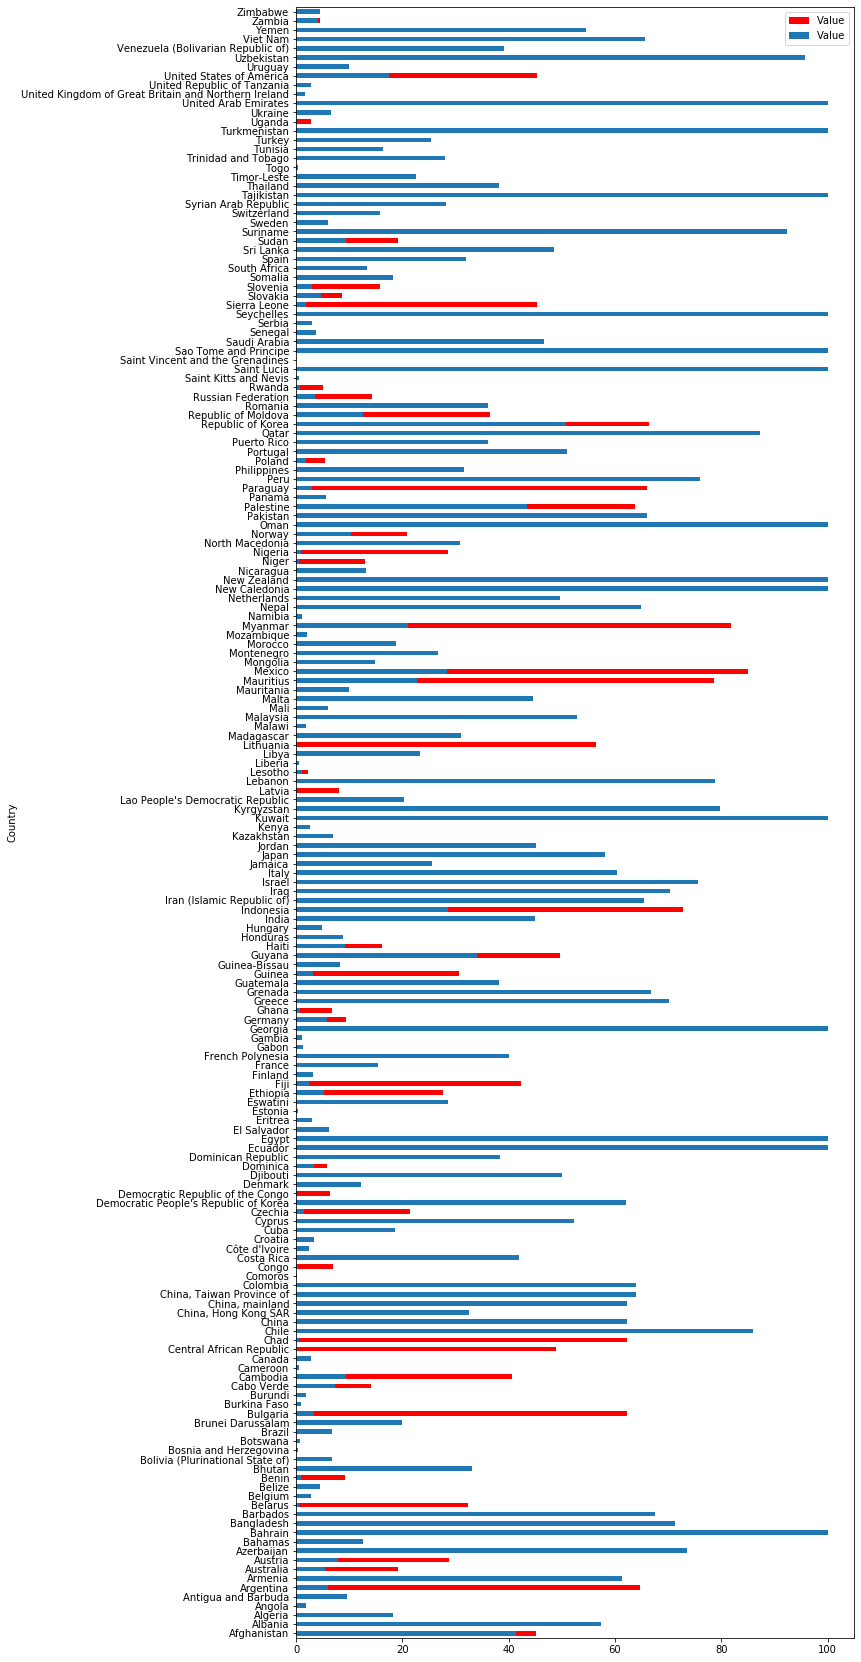

In [81]:
ax = df1_msfi.plot.barh(figsize=(10,30), x='Country', y='Value', color='red')
df1_arable.plot.barh(ax=ax, x='Country', y='Value')

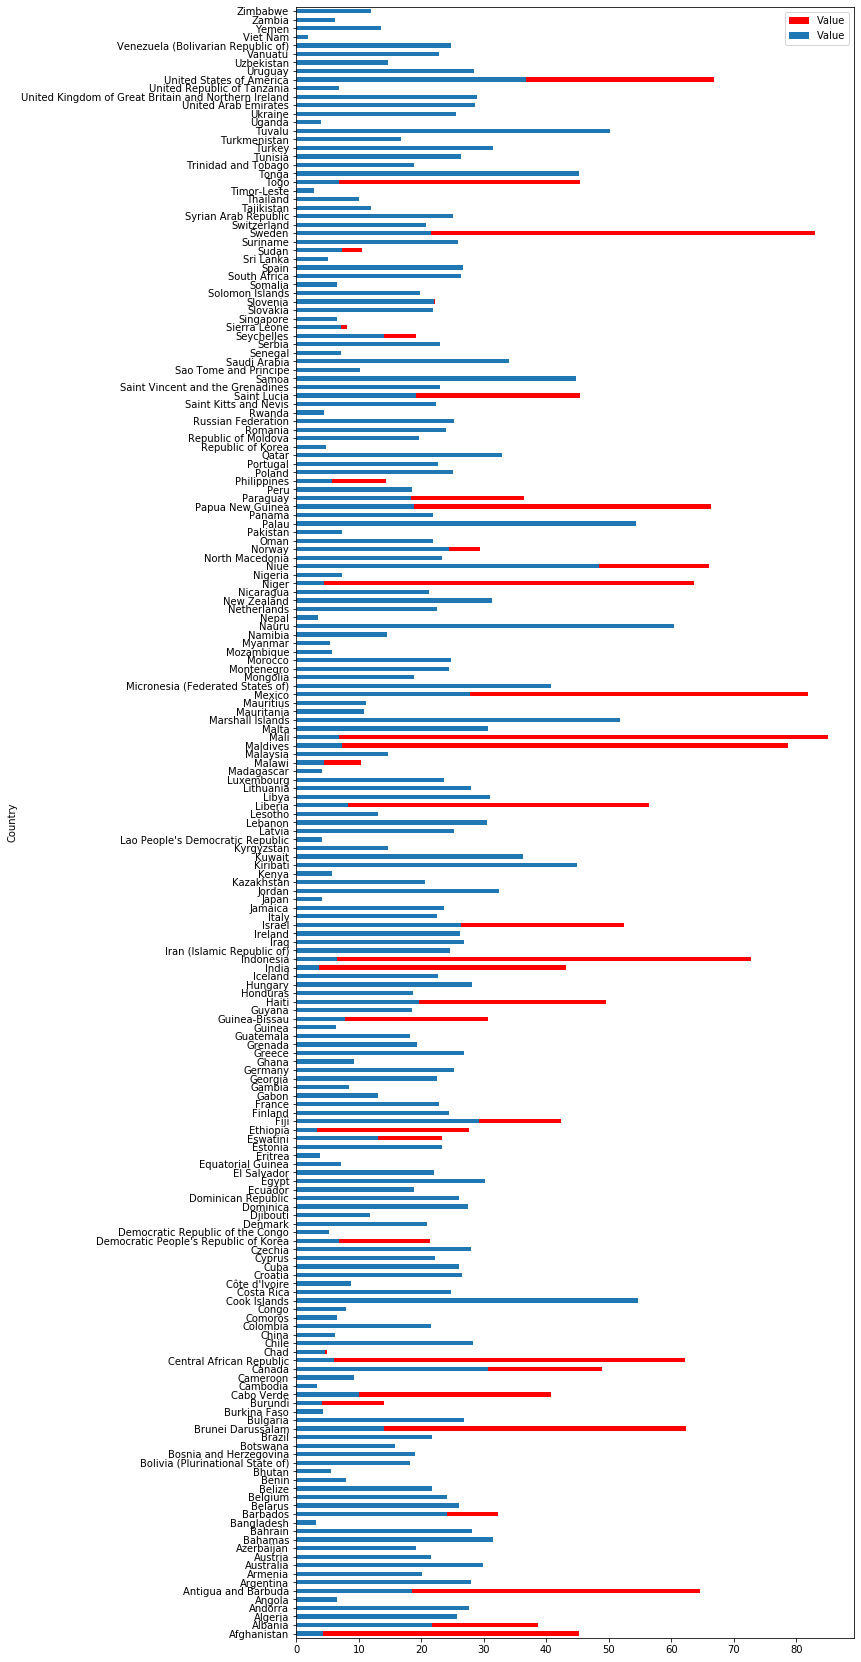

In [82]:
ax = df1_msfi.plot.barh(figsize=(10,30), x='Country', y='Value', color='red')
df1_obese.plot.barh(ax=ax, x='Country', y='Value')

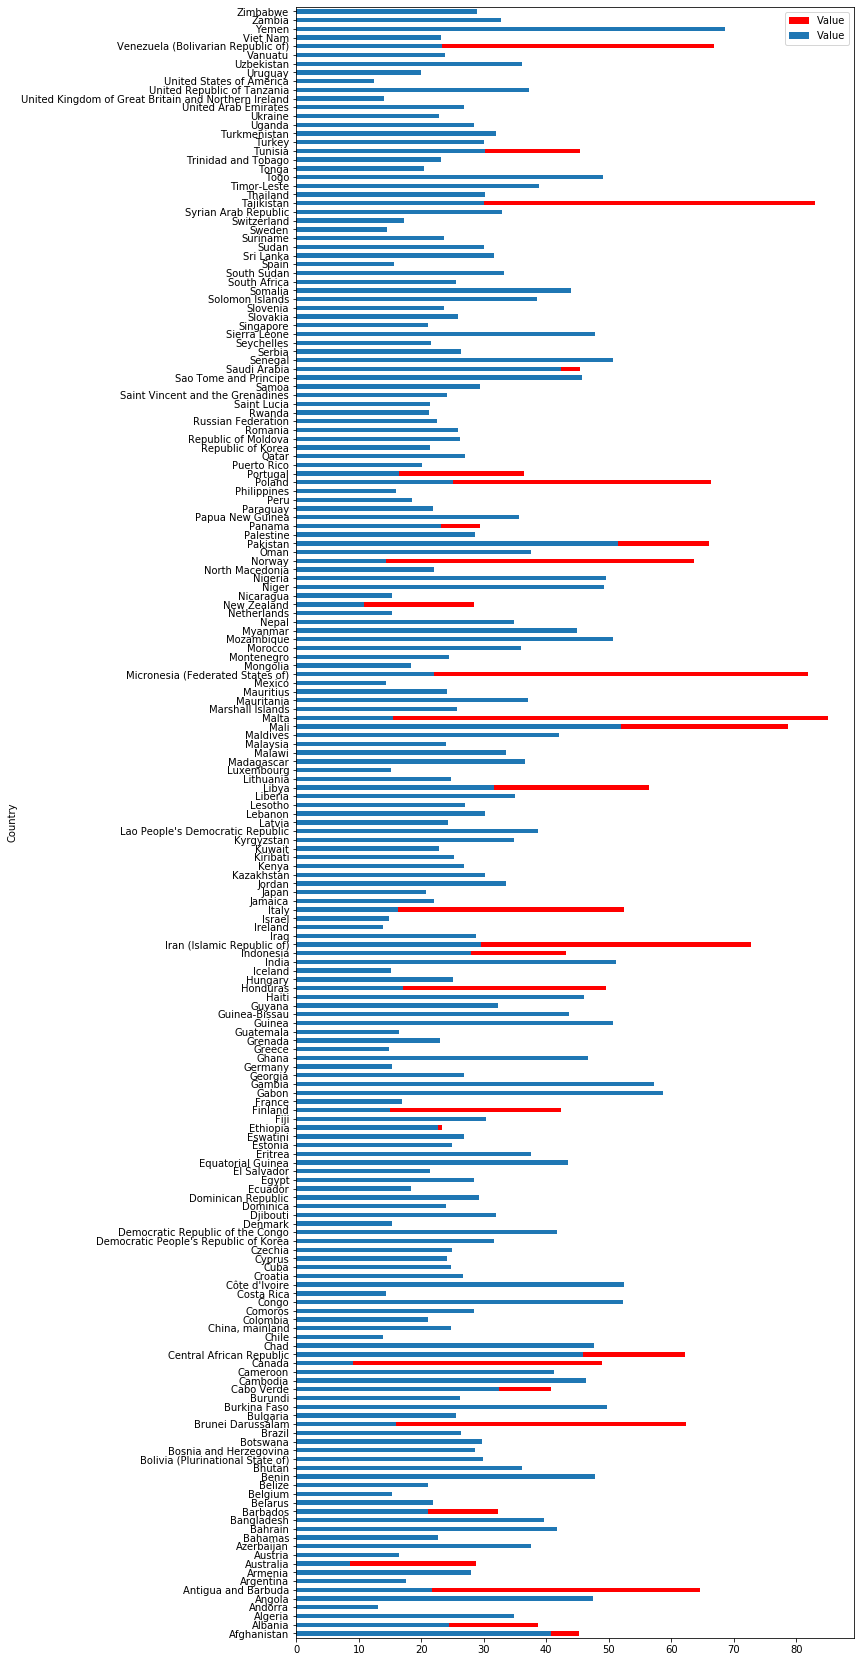

In [86]:
ax = df1_msfi.plot.barh(figsize=(10,30), x='Country', y='Value', color='red')
df1_anemia.plot.barh(ax=ax, x='Country', y='Value')

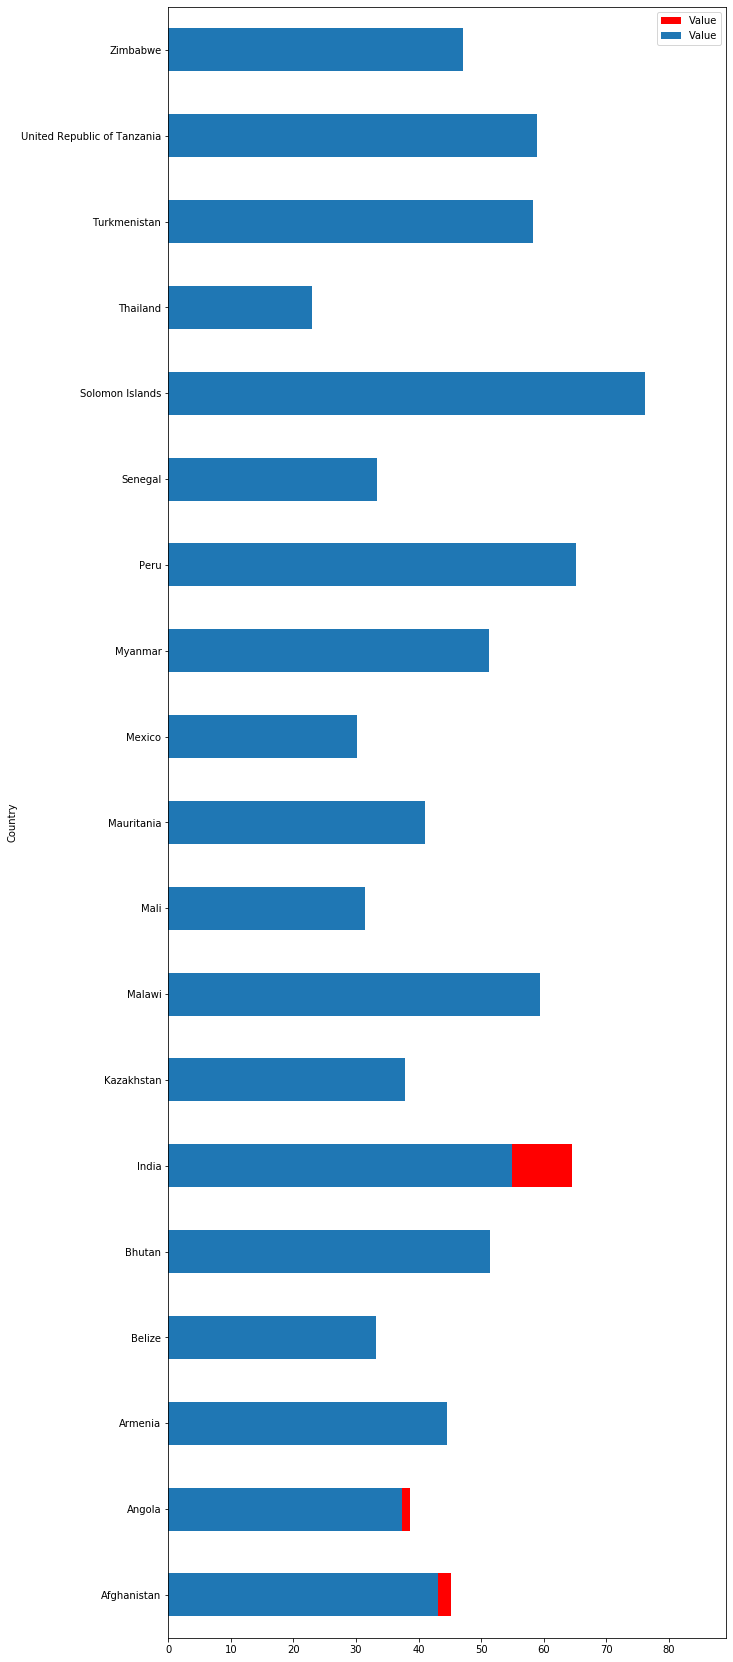

In [87]:
ax = df1_msfi.plot.barh(figsize=(10,30), x='Country', y='Value', color='red')
df1_breastfeeding.plot.barh(ax=ax, x='Country', y='Value')